<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/face_landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [ ]:
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

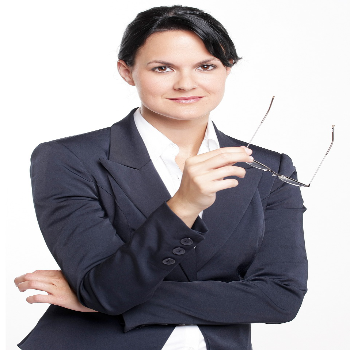

In [ ]:
img = cv2.imread("image.png")
img = cv2.resize(img , (350 , 350))
cv2_imshow(img)

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

In [ ]:
image = mp.Image.create_from_file("image.png")

In [ ]:
detection_result = detector.detect(image)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
dir(detection_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'face_blendshapes',
 'face_landmarks',
 'facial_transformation_matrixes']

In [ ]:
len(detection_result.face_blendshapes[0])

52

In [ ]:
detection_result.face_blendshapes[0]

[Category(index=0, score=2.7253420284978347e-06, display_name='', category_name='_neutral'),
 Category(index=1, score=0.1256556659936905, display_name='', category_name='browDownLeft'),
 Category(index=2, score=0.10741700232028961, display_name='', category_name='browDownRight'),
 Category(index=3, score=0.00015090921078808606, display_name='', category_name='browInnerUp'),
 Category(index=4, score=0.0580316036939621, display_name='', category_name='browOuterUpLeft'),
 Category(index=5, score=0.029591284692287445, display_name='', category_name='browOuterUpRight'),
 Category(index=6, score=3.763045242521912e-05, display_name='', category_name='cheekPuff'),
 Category(index=7, score=2.0550294266286073e-07, display_name='', category_name='cheekSquintLeft'),
 Category(index=8, score=2.673679659892514e-07, display_name='', category_name='cheekSquintRight'),
 Category(index=9, score=0.06272837519645691, display_name='', category_name='eyeBlinkLeft'),
 Category(index=10, score=0.0326368324458

In [ ]:
max_score = 0
max_score_expression = ""
for res in detection_result.face_blendshapes[0]:
  if res.score > max_score:
    max_score = res.score
    max_score_expression = res.category_name
max_score_expression

'mouthSmileLeft'

In [ ]:
detection_result.face_landmarks[0][0]

NormalizedLandmark(x=0.5364461541175842, y=0.2776353657245636, z=-0.022411441430449486, visibility=0.0, presence=0.0)